### Задание 1

1.1 Импортируйте библиотеки pandas, numpy и matplotlib.

1.2 Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.

1.3 Создайте датафреймы X и y из этих данных.

1.4 Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

1.5 Масштабируйте данные с помощью StandardScaler.

1.6 Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

1.7 Постройте диаграмму рассеяния на этих данных.

In [1]:
# 1.1
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
# 1.2
boston = load_boston()

In [3]:
# 1.3
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
234,0.44791,0.0,6.20,1.0,0.5070,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05
43,0.15936,0.0,6.91,0.0,0.4480,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
281,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59
497,0.26838,0.0,9.69,0.0,0.5850,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
94,0.04294,28.0,15.04,0.0,0.4640,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59


In [4]:
y = pd.DataFrame(boston.target, columns=['price'])
y.sample(5)

,price
0,24.0
225,50.0
333,22.2
415,7.2
202,42.3


In [5]:
# 1.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 1.5
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
# 1.6
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

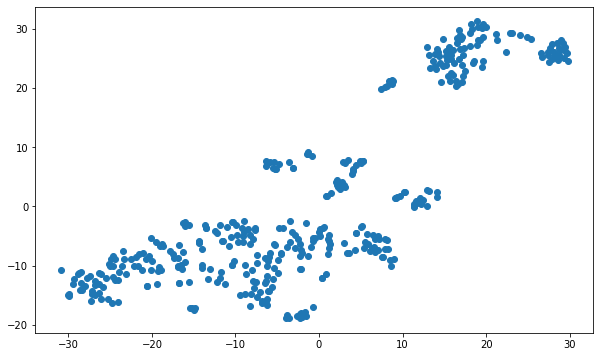

In [8]:
from IPython.core.pylabtools import figsize
# 1.7
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X_train_tsne[:, 0], y = X_train_tsne[:, 1])

plt.show()

### Задание 2

2.1 С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

2.2 Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

2.3 Вычислите средние значения price и CRIM в разных кластерах.


In [9]:
# 2.1
km_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = km_model.fit_predict(X_train_scaled)
np.unique(labels_train)

array([0, 1, 2], dtype=int32)

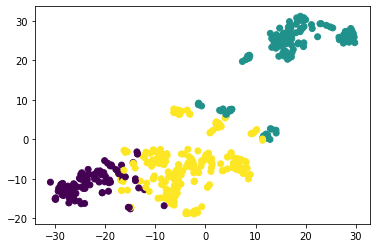

In [10]:
# 2.2
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [11]:
# 2.3 `price`:
cl1_mean_price = y_train.price[labels_train == 0].mean()
cl2_mean_price = y_train.price[labels_train == 1].mean()
cl3_mean_price = y_train.price[labels_train == 2].mean()
print('cluster 1: {}, cluster 2: {}, cluster 3: {}'.format(cl1_mean_price, cl2_mean_price, cl3_mean_price))

cluster 1: 27.788372093023252, cluster 2: 16.165354330708666, cluster 3: 24.958115183246072


In [12]:
# 2.3 `CRIM`:
cl1_mean_crim = X_train.CRIM[labels_train == 0].mean()
cl2_mean_crim = X_train.CRIM[labels_train == 1].mean()
cl3_mean_crim = X_train.CRIM[labels_train == 2].mean()
print('cluster 1: {}, cluster 2: {}, cluster 3: {}'.format(cl1_mean_crim, cl2_mean_crim, cl3_mean_crim))

cluster 1: 0.07356558139534886, cluster 2: 10.797028425196853, cluster 3: 0.42166020942408367


### Задание 3*

3.1 Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

3.2 Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.




In [20]:
# 3.1 
labels_test = km_model.predict(X_test_scaled)
labels_test[:10]

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2], dtype=int32)

In [17]:
# 3.2 `price`:
cl1_mean_price = y_test.price[labels_test == 0].mean()
cl2_mean_price = y_test.price[labels_test == 1].mean()
cl3_mean_price = y_test.price[labels_test == 2].mean()
print('cluster 1: {}, cluster 2: {}, cluster 3: {}'.format(cl1_mean_price, cl2_mean_price, cl3_mean_price))

cluster 1: 31.35, cluster 2: 16.437142857142856, cluster 3: 21.860784313725492


In [19]:
# 3.2 `CRIM`:
cl1_mean_crim = X_test.CRIM[labels_test == 0].mean()
cl2_mean_crim = X_test.CRIM[labels_test == 1].mean()
cl3_mean_crim = X_test.CRIM[labels_test == 2].mean()
print('cluster 1: {}, cluster 2: {}, cluster 3: {}'.format(cl1_mean_crim, cl2_mean_crim, cl3_mean_crim))

cluster 1: 0.062060000000000004, cluster 2: 10.165531142857143, cluster 3: 0.26607882352941176
